<a href="https://colab.research.google.com/github/bimalthomas/bimal/blob/master/TSFDataScienceTask1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***To Explore Supervised Mechine Learning (Linear Regression)***

In this regression task, we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. We use the data available at http://bit.ly/w-data.


>**Importing Modules:**



In [31]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns





> **Reading and Preparing Data:**













In [32]:
# Reading Data

data = pd.read_csv('http://bit.ly/w-data')
print('Shape of the dataset is: ', data.shape)
data.head(10)


Shape of the dataset is:  (25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25




> **Checking for Missing Values**



In [33]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64



> **Summary of Data**





In [34]:
# Summary of Data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


> **Visualization of Data**

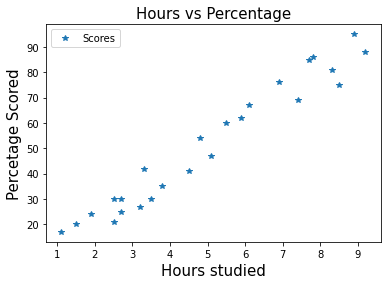

In [35]:
# plotting the distribution of scores
data.plot(x='Hours', y='Scores',style='o',marker='*')
plt.title('Hours vs Percentage',fontsize=15)
plt.xlabel('Hours studied',fontsize=15)
plt.ylabel('Percetage Scored',fontsize=15)
plt.show()

> **Creating Variable X and Y**

In [36]:
# Creating two variables X and Y to hold hour and score values for regression:

X = data.iloc[:, :1].values
y = data.iloc[:, 1].values

In [37]:
print(X)
print(y)


[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


> **Dimension of X and Y**

In [38]:
len(X)
len(y)

25



> 
> **Preparing Data and splitting into train and test sets**



In [39]:
# Creating a train test split in the ratio 80:20 to evaluate data:

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [40]:

## We have Splitted Our Data Using 80:20 RULe(PARETO)
print("X train.shape =", X_train.shape)
print("Y train.shape =", y_train.shape)
print("X test.shape  =", X_test.shape)
print("Y test.shape  =", y_test.shape)

X train.shape = (20, 1)
Y train.shape = (20,)
X test.shape  = (5, 1)
Y test.shape  = (5,)




> **Fitting the Model**






In [41]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
##Fitting Training Data
linreg.fit(X_train,y_train)
print("Training our algorithm is finished")

Training our algorithm is finished


In [42]:
print("B0 =",linreg.intercept_,"\nB1 =",linreg.coef_)## β0 is Intercept & Slope of the line is β1.,"

B0 = 2.018160041434662 
B1 = [9.91065648]


In [43]:
##plotting the REGRESSION LINE---
Y0 = linreg.intercept_ + linreg.coef_*X_train

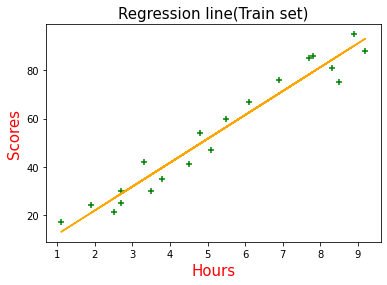

In [44]:
##plotting on train data
plt.scatter(X_train,y_train,color='green',marker='+')
plt.plot(X_train,Y0,color='orange')
plt.xlabel("Hours",fontsize=15,color='red')
plt.ylabel("Scores",fontsize=15,color='red')
plt.title("Regression line(Train set)",fontsize=15)
plt.show()



> **Predicting the Scores for test data**



In [45]:
y_pred=linreg.predict(X_test)##predicting the Scores for test data
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [46]:
#now print the Y_test.
y_test

array([20, 27, 69, 30, 62])

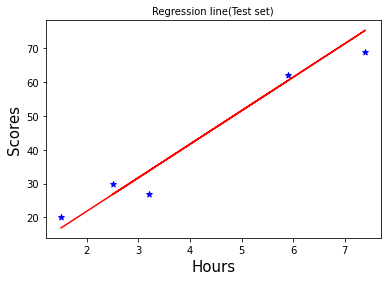

In [47]:

#plotting line on test data
plt.plot(X_test,y_pred,color='red')
plt.scatter(X_test,y_test,color='blue',marker='*')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Test set)",fontsize=10)
plt.show()



> **Comparing Actual Vs Predicted Scores**



In [48]:

y_test1 = list(y_test)
prediction=list(y_pred)
df_compare = pd.DataFrame({ 'Actual':y_test1,'Result':prediction})
df_compare

,Actual,Result
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


> **Accuracy of the Model**

In [49]:

from sklearn import metrics
metrics.r2_score(y_test,y_pred)##Goodness of fit Test

0.9454906892105354

**Above 94% percentage indicates that above fitted Model is a GOOD MODEL**



> **Predicting the Error**



In [50]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [51]:
MSE = metrics.mean_squared_error(y_test,y_pred)
root_E = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
Abs_E = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print("Mean Squared Error      = ",MSE)
print("Root Mean Squared Error = ",root_E)
print("Mean Absolute Error     = ",Abs_E)

Mean Squared Error      =  21.598769307217456
Root Mean Squared Error =  4.647447612100373
Mean Absolute Error     =  4.647447612100373




> **Predicting the Score**



In [52]:
Prediction_score = linreg.predict([[9.25]])
print("predicted score for a student studying 9.25 hours :",Prediction_score)

predicted score for a student studying 9.25 hours : [93.69173249]




> **CONCLUSION**

> **From the above result we can say that if a studied for 9.25 then student will secured 93.69 MARKS**



